In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

# Load the Data

In [101]:
df = pd.read_csv("loan.csv", low_memory = False)

In [102]:
df.shape

(887379, 74)

In [103]:
df.drop('id',1,inplace=True)
df = df.dropna(axis=0,how='all')

In [104]:
df.shape

(887379, 73)

In [ ]:
df.isnull().sum()

# Take a Quick Look at the Data

In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [5]:
df.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [6]:
pd.options.display.max_columns = 74
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,511.000000,509.000000,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,109981.011585,18.310118,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,52730.379847,7.169233,0.077625,1.031137e+04,1.537500e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,1.0,76032.500000,13.200000,0.000000,0.000000e+00,2.985300e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,1.0,101771.000000,17.610000,0.000000,0.000000e+00,8.055900e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.0000

In [7]:
df.grade = pd.Categorical(df.grade)
df.loan_status = pd.Categorical(df.loan_status)
df.loan_amnt = np.float64(df.loan_amnt)
df.annual_inc = np.float64(df.annual_inc)
df.int_rate = np.float64(df.int_rate)
df.total_rec_late_fee = np.float64(df.total_rec_late_fee)
df.dti = np.float64(df.dti)
#****   df.issue_d = np.todatetime()

# Histograms of Categorical Data

B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64


Text(0.5,0,'Loan Grades')

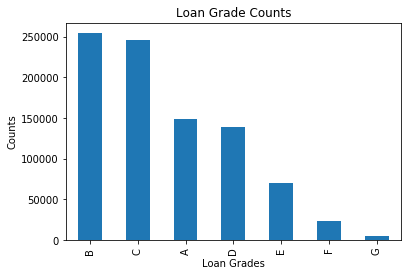

In [8]:
LoanGradeCounts = df.grade.value_counts()
print (LoanGradeCounts)

LoanGradeCounts.plot(kind='bar', title="Loan Grade Counts")
plt.ylabel("Counts")
plt.xlabel("Loan Grades")

B3    56323
B4    55626
C1    53387
C2    52236
C3    50161
C4    48857
B5    48833
B2    48781
B1    44972
A5    44816
C5    41219
D1    36238
A4    34531
D2    29803
D3    26554
D4    25558
A3    23457
A1    22913
A2    22485
D5    21389
E1    18268
E2    17004
E3    14134
E4    11724
E5     9575
F1     7218
F2     5392
F3     4433
F4     3409
F5     2594
G1     1871
G2     1398
G3      981
G4      663
G5      576
Name: sub_grade, dtype: int64


Text(0.5,0,'Loan Grades')

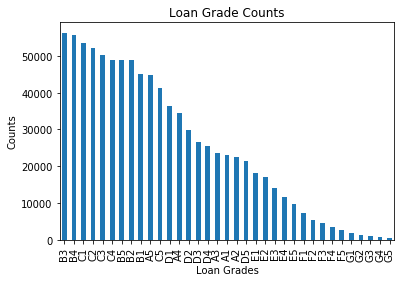

In [9]:
LoanGradeCounts = df.sub_grade.value_counts()
print (LoanGradeCounts)

LoanGradeCounts.plot(kind='bar', title="Loan Grade Counts")
plt.ylabel("Counts")
plt.xlabel("Loan Grades")

B3    56323
B4    55626
C1    53387
C2    52236
C3    50161
C4    48857
B5    48833
B2    48781
B1    44972
A5    44816
C5    41219
D1    36238
A4    34531
D2    29803
D3    26554
D4    25558
A3    23457
A1    22913
A2    22485
D5    21389
E1    18268
E2    17004
E3    14134
E4    11724
E5     9575
F1     7218
F2     5392
F3     4433
F4     3409
F5     2594
G1     1871
G2     1398
G3      981
G4      663
G5      576
Name: sub_grade, dtype: int64


Text(0,0.5,'Sub Grade')

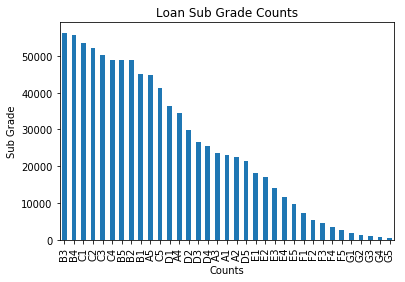

In [10]:
SubGradeCounts = df.sub_grade.value_counts()
print(SubGradeCounts)


SubGradeCounts.plot(kind = 'bar', title = 'Loan Sub Grade Counts')
plt.xlabel("Counts")
plt.ylabel("Sub Grade")

INDIVIDUAL    886868
JOINT            511
Name: application_type, dtype: int64


Text(0.5,0,'Application Types')

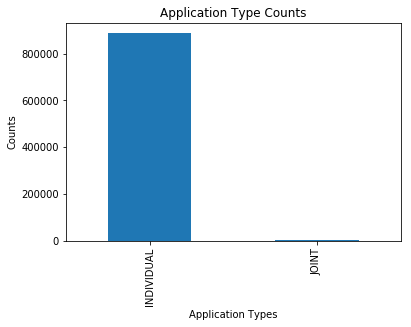

In [11]:
ApplicationTypeCounts = df.application_type.value_counts()
print (ApplicationTypeCounts)

ApplicationTypeCounts.plot(kind='bar', title="Application Type Counts")
plt.ylabel("Counts")
plt.xlabel("Application Types")

CA    129517
NY     74086
TX     71138
FL     60935
IL     35476
NJ     33256
PA     31393
OH     29631
GA     29085
VA     26255
NC     24720
MI     22985
MD     21031
MA     20593
AZ     20412
WA     19434
CO     18807
MN     15957
MO     14207
IN     13789
CT     13531
TN     12887
NV     12443
WI     11574
AL     11200
OR     10893
SC     10639
LA     10587
KY      8550
OK      8085
KS      7926
AR      6640
UT      6264
NM      4939
HI      4570
WV      4386
NH      4294
RI      3893
MS      3819
MT      2558
DE      2511
DC      2432
AK      2205
WY      2028
SD      1815
VT      1797
NE      1176
ME       525
ND       479
IA        14
ID        12
Name: addr_state, dtype: int64


Text(0.5,0,'State of Lendee')

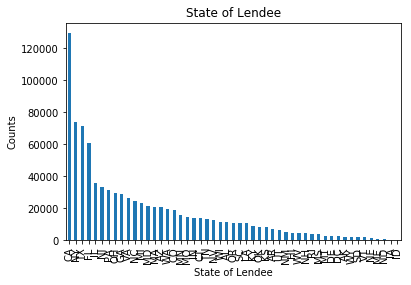

In [12]:
StateCounts = df.addr_state.value_counts()
print (StateCounts)

StateCounts.plot(kind = 'bar', title = "State of Lendee")
plt.ylabel("Counts")
plt.xlabel("State of Lendee")

Teacher                                    13469
Manager                                    11240
Registered Nurse                            5525
Owner                                       5376
RN                                          5355
Supervisor                                  4983
Sales                                       4212
Project Manager                             3988
Driver                                      3569
Office Manager                              3510
General Manager                             3178
Director                                    3156
manager                                     3138
teacher                                     2925
owner                                       2849
Engineer                                    2671
President                                   2598
driver                                      2429
Vice President                              2351
Attorney                                    2136
Operations Manager  

Text(0.5,0,'Employment Title')

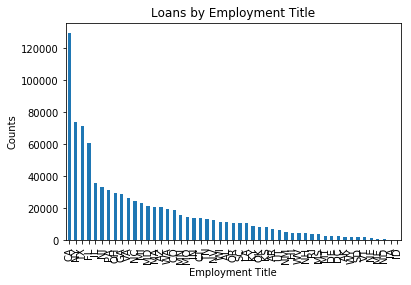

In [13]:
EmploymentTitleCounts = df.emp_title.value_counts()
print (EmploymentTitleCounts)

StateCounts.plot(kind = 'bar', title = "Loans by Employment Title")
plt.ylabel("Counts")
plt.xlabel("Employment Title")

In [94]:
emp = pd.DataFrame(Counter(df.emp_title).most_common(21), columns=['profession', 'N'])
print (emp)

          profession      N
0                NaN  51457
1            Teacher  13469
2            Manager  11240
3   Registered Nurse   5525
4              Owner   5376
5                 RN   5355
6         Supervisor   4983
7              Sales   4212
8    Project Manager   3988
9             Driver   3569
10    Office Manager   3510
11   General Manager   3178
12          Director   3156
13           manager   3138
14           teacher   2925
15             owner   2849
16          Engineer   2671
17         President   2598
18            driver   2429
19    Vice President   2351
20          Attorney   2136


In [95]:
emp.N[emp.profession == 'Teacher'] = emp.N[emp.profession == 'Teacher'] + 2925
emp.N[emp.profession == 'Manager'] = emp.N[emp.profession == 'Manager'] + 3138
emp.N[emp.profession == 'Registered Nurse'] = emp.N[emp.profession == 'Registered Nurse'] + 5355
emp.N[emp.profession == 'Owner'] = emp.N[emp.profession == 'Owner'] + 2849
emp.N[emp.profession == 'Driver'] = emp.N[emp.profession == 'Driver'] + 2429




emp = emp[(emp.profession != 'teacher') 
          & (emp.profession != 'manager')
          & (emp.profession != 'RN')
          & (emp.profession != 'owner')
          & (emp.profession != 'driver')
          & (emp.profession.isnull() == False)]


print(emp)

          profession      N
1            Teacher  16394
2            Manager  14378
3   Registered Nurse  10880
4              Owner   8225
6         Supervisor   4983
7              Sales   4212
8    Project Manager   3988
9             Driver   5998
10    Office Manager   3510
11   General Manager   3178
12          Director   3156
16          Engineer   2671
17         President   2598
19    Vice President   2351
20          Attorney   2136


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


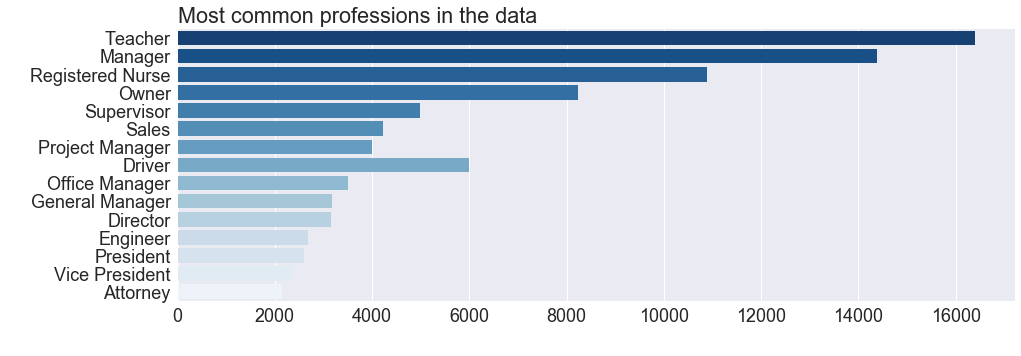

In [96]:
sns.set(font_scale=1.8)
ax = sns.barplot(data=emp, y = 'profession', x='N', orient='h', palette=sns.color_palette(palette='Blues', n_colors=len(emp))[::-1])
plt.title('Most common professions seeking Lending Club loans', loc='left')
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(15,5)

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64


Text(0.5,0,'Home Ownership')

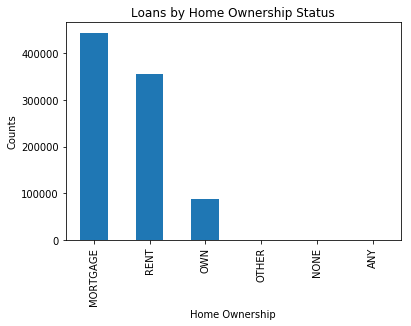

In [14]:
HomeOwnershipCounts = df.home_ownership.value_counts()
print (HomeOwnershipCounts)

HomeOwnershipCounts.plot(kind = 'bar', title = "Loans by Home Ownership Status")
plt.ylabel("Counts")
plt.xlabel("Home Ownership")

f    456848
w    430531
Name: initial_list_status, dtype: int64


Text(0.5,0,'Initial List Status')

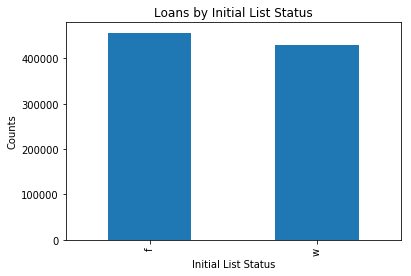

In [15]:
StatusCounts = df.initial_list_status.value_counts()
print (StatusCounts)

StatusCounts.plot(kind = 'bar', title = "Loans by Initial List Status")
plt.ylabel("Counts")
plt.xlabel("Initial List Status")

0.0     497905
1.0     241494
2.0      94117
3.0      37398
4.0      10758
5.0       3985
6.0       1231
7.0        195
8.0        122
9.0         50
10.0        24
11.0        15
12.0        15
15.0         9
14.0         6
13.0         6
18.0         4
16.0         3
17.0         2
19.0         2
24.0         2
31.0         1
32.0         1
25.0         1
28.0         1
20.0         1
33.0         1
27.0         1
Name: inq_last_6mths, dtype: int64


Text(0.5,0,'Number of Inquiries')

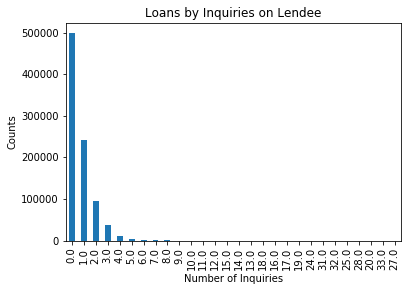

In [16]:
Inquiries_L6M_Counts = df.inq_last_6mths.value_counts()
print (Inquiries_L6M_Counts)

Inquiries_L6M_Counts.plot(kind = 'bar', title = "Loans by Inquiries on Lendee")
plt.ylabel("Counts")
plt.xlabel("Number of Inquiries")

Jan-2016    730574
Dec-2015     19308
Nov-2015     11490
Oct-2015     10419
Sep-2015     10087
Jul-2015      8642
Aug-2015      7987
Jun-2015      7130
Apr-2015      6160
May-2015      5930
Mar-2015      5775
Jan-2015      5271
Feb-2015      5017
Dec-2014      3702
Oct-2014      3358
Nov-2014      3168
Sep-2014      2961
Aug-2014      2812
Jul-2014      2773
May-2014      2290
Jun-2014      2236
Mar-2014      2204
Apr-2014      2191
Feb-2014      1931
Jan-2014      1793
Feb-2013      1446
Nov-2013      1412
Dec-2013      1395
Oct-2013      1273
Sep-2013      1063
             ...  
Oct-2009        54
Nov-2009        53
Jan-2009        40
Jan-2010        36
Aug-2009        33
Apr-2009        25
Jul-2009        21
Sep-2009        21
Feb-2009        21
Jun-2009        20
Aug-2007        17
Mar-2009        17
Jun-2007        16
Aug-2008        15
May-2009        14
Oct-2008        13
May-2007        10
Sep-2008         9
Mar-2008         8
Dec-2008         7
Sep-2007         5
Jan-2008    

Text(0.5,0,'Number of Last Month Pulled Credit')

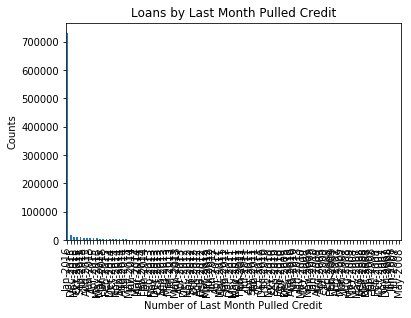

In [18]:

Last_Credit_Pulled_Counts = df.last_credit_pull_d.value_counts()
print (Last_Credit_Pulled_Counts)

Last_Credit_Pulled_Counts.plot(kind = 'bar', title = "Loans by Last Month Pulled Credit")
plt.ylabel("Counts")
plt.xlabel("Number of Last Month Pulled Credit")

Jan-2016    470150
Dec-2015    150861
Oct-2015     16000
Jul-2015     14483
Nov-2015     13981
Sep-2015     13834
Aug-2015     13040
Jun-2015     11983
Apr-2015     11107
May-2015     11069
Mar-2015     10760
Feb-2015      8849
Jan-2015      8658
Oct-2014      7676
Dec-2014      7253
Sep-2014      6316
Jul-2014      6312
Aug-2014      6305
Nov-2014      6206
Jun-2014      5620
May-2014      4721
Mar-2014      4572
Apr-2014      4327
Jan-2014      3655
Feb-2014      3632
Dec-2013      3050
Oct-2013      2832
Nov-2013      2662
Aug-2013      2515
Sep-2013      2510
             ...  
May-2010       151
Jun-2010       150
Feb-2010       148
Apr-2010       145
Dec-2009       116
Jan-2010       100
Oct-2009        85
Nov-2009        80
Apr-2009        72
Jul-2009        72
Aug-2009        66
Jun-2009        65
Feb-2009        65
Mar-2009        62
May-2009        60
Sep-2009        55
Oct-2008        55
Jan-2009        40
Sep-2008        40
Jul-2008        37
Aug-2008        31
Nov-2008    

Text(0.5,0,'Number of Last Payment Month')

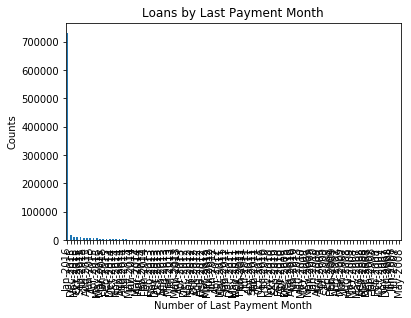

In [19]:
## Do the same with this field

last_pymnt_d_Counts = df.last_pymnt_d.value_counts()
print (last_pymnt_d_Counts)

Last_Credit_Pulled_Counts.plot(kind = 'bar', title = "Loans by Last Payment Month")
plt.ylabel("Counts")
plt.xlabel("Number of Last Payment Month")

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


Text(0.5,0,'Loan Status')

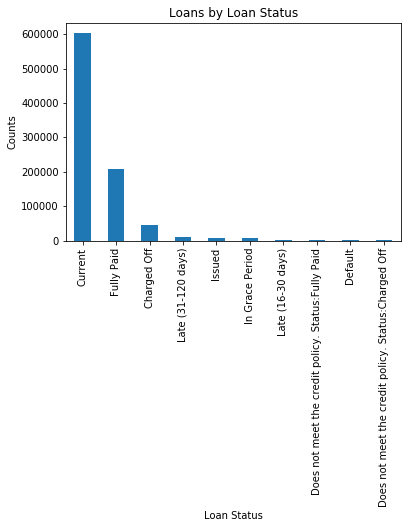

In [20]:
Loan_Status_Counts = df.loan_status.value_counts()
print (Loan_Status_Counts)

Loan_Status_Counts.plot(kind = 'bar', title = "Loans by Loan Status")
plt.ylabel("Counts")
plt.xlabel("Loan Status")

9.0     80285
10.0    78321
8.0     76578
11.0    72265
7.0     67896
12.0    64690
13.0    56642
6.0     55954
14.0    47814
15.0    39778
5.0     39766
16.0    33310
17.0    27262
4.0     23367
18.0    22327
19.0    18274
20.0    14475
21.0    11600
3.0      9619
22.0     9306
23.0     7328
24.0     5875
25.0     4700
26.0     3402
27.0     2825
2.0      2776
28.0     2122
29.0     1750
30.0     1329
31.0     1047
        ...  
47.0       30
49.0       23
51.0       17
53.0       16
50.0       14
52.0       13
55.0        8
0.0         7
56.0        6
58.0        5
54.0        5
76.0        2
60.0        2
59.0        2
61.0        2
62.0        2
70.0        1
68.0        1
65.0        1
67.0        1
66.0        1
75.0        1
82.0        1
79.0        1
63.0        1
84.0        1
57.0        1
90.0        1
64.0        1
74.0        1
Name: open_acc, Length: 77, dtype: int64


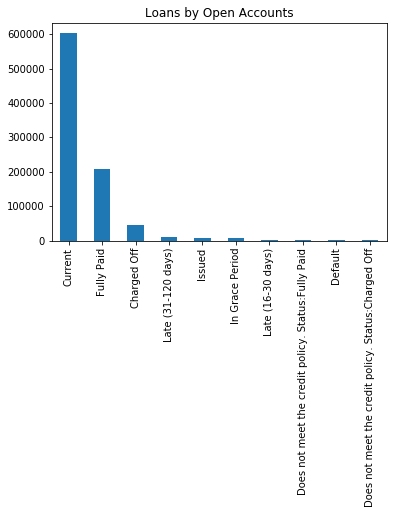

In [21]:
Open_acc_Counts = df.open_acc.value_counts()
print (Open_acc_Counts)

Loan_Status_Counts.plot(kind = 'bar', title = "Loans by Open Accounts")

1.0    887379
Name: policy_code, dtype: int64


Text(0.5,0,'Policy Code')

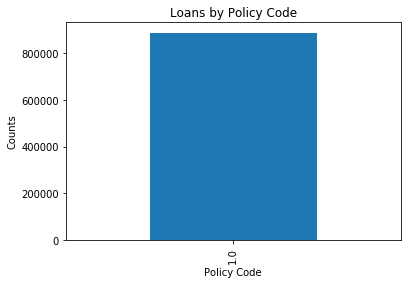

In [22]:
Policy_Code_Counts = df.policy_code.value_counts()
print (Policy_Code_Counts)

Policy_Code_Counts.plot(kind = 'bar', title = "Loans by Policy Code")
plt.ylabel("Counts")
plt.xlabel("Policy Code")

0.0     751572
1.0     113266
2.0      14854
3.0       4487
4.0       1564
5.0        757
6.0        385
7.0        170
8.0        113
9.0         50
10.0        42
11.0        23
12.0        16
13.0        12
15.0         6
18.0         5
16.0         5
21.0         4
17.0         3
14.0         2
49.0         2
19.0         2
40.0         1
86.0         1
20.0         1
23.0         1
63.0         1
22.0         1
28.0         1
34.0         1
26.0         1
54.0         1
Name: pub_rec, dtype: int64


Text(0.5,0,'Number of Public Records')

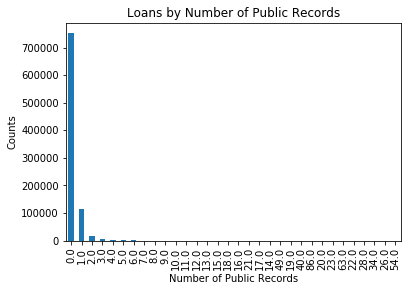

In [24]:
pub_rec_Counts = df.pub_rec.value_counts()
print (pub_rec_Counts)

pub_rec_Counts.plot(kind = 'bar', title = "Loans by Number of Public Records")
plt.ylabel("Counts")
plt.xlabel("Number of Public Records")

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64


Text(0.5,0,'Purpose')

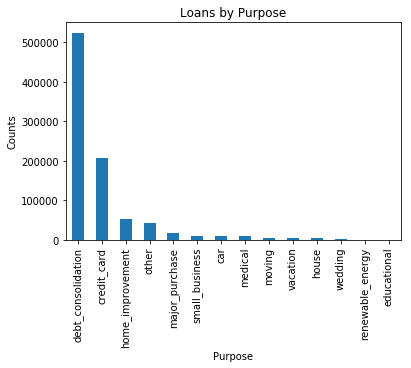

In [25]:
purpose_Counts = df.purpose.value_counts()
print (purpose_Counts)

purpose_Counts.plot(kind = 'bar', title = "Loans by Purpose")
plt.ylabel("Counts")
plt.xlabel("Purpose")

In [28]:
title_counts = df.title.value_counts()
print (title_counts)

title_counts.plot(kind = 'bar', title = 'Loans by Title Counts')
plt.ylabel('Counts')
plt.xlabel('Title')

Debt consolidation                          414001
Credit card refinancing                     164331
Home improvement                             40112
Other                                        31892
Debt Consolidation                           15760
Major purchase                               12051
Business                                      6728
Medical expenses                              6674
Car financing                                 5565
Consolidation                                 5381
debt consolidation                            4834
Moving and relocation                         3921
Vacation                                      3805
Debt Consolidation Loan                       3804
Home buying                                   2365
Credit Card Consolidation                     2359
consolidation                                 2174
Personal Loan                                 2133
Consolidation Loan                            1778
Home Improvement               

Text(0.5,0,'Title')

ValueError: 
Money$$
     ^
Expected end of text (at char 5), (line:1, col:6)

Source Verified    329558
Verified           291071
Not Verified       266750
Name: verification_status, dtype: int64


Text(0.5,0,'Verified Status')

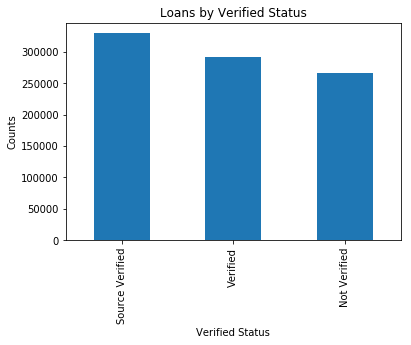

In [31]:
verified_status_counts = df.verification_status.value_counts()
print (verified_status_counts)

verified_status_counts.plot(kind = 'bar', title = "Loans by Verified Status")
plt.ylabel("Counts")
plt.xlabel("Verified Status")

# Old Fashioned Histograms

60000.00     34281
50000.00     30575
65000.00     25498
70000.00     24121
40000.00     23943
80000.00     22729
45000.00     22699
75000.00     22435
55000.00     20755
90000.00     17159
100000.00    17131
85000.00     15648
35000.00     14868
30000.00     13764
120000.00    13202
52000.00     12174
42000.00     11705
48000.00     11330
110000.00    11090
72000.00      9656
95000.00      9274
150000.00     8136
62000.00      7770
36000.00      7700
38000.00      7208
125000.00     7006
32000.00      6774
54000.00      6627
58000.00      6621
56000.00      6557
             ...  
65032.00         1
65033.00         1
65035.00         1
65037.00         1
26260.00         1
65039.00         1
49275.22         1
65041.00         1
65045.00         1
101081.00        1
25270.00         1
25269.00         1
65052.00         1
15964.00         1
36895.02         1
65056.00         1
82999.92         1
73330.67         1
65062.00         1
101073.00        1
65065.00         1
101069.00   

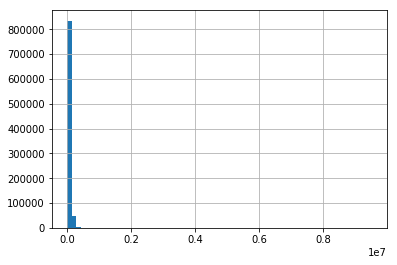

In [44]:
#annual_inc
df["annual_inc"].hist(bins=65)
#sns.plt.title("Annual Income")
#sns.plt.ylabel("Number of prices")
#sns.plt.xlabel("Cost per standard unit, USD")

Income_Values = df.annual_inc.value_counts()
print (Income_Values)

##Count the number of places where this value is null

19.20     684
14.40     674
18.00     661
13.20     638
16.80     632
15.60     626
20.40     598
12.00     596
21.60     594
24.00     534
22.80     525
10.80     522
17.76     506
16.20     504
17.04     498
17.28     494
18.72     493
15.84     491
15.12     489
14.64     489
16.32     489
16.08     486
13.44     486
14.16     484
13.92     484
13.68     483
18.60     480
12.48     478
16.56     476
19.68     475
         ... 
52.80       1
67.50       1
43.49       1
45.32       1
42.17       1
43.68       1
41.46       1
90.00       1
71.40       1
45.78       1
48.56       1
68.41       1
83.64       1
54.10       1
44.09       1
137.40      1
52.45       1
42.10       1
40.56       1
43.78       1
41.49       1
69.35       1
43.98       1
54.36       1
104.00      1
77.06       1
42.04       1
41.94       1
54.19       1
55.10       1
Name: dti, Length: 4086, dtype: int64


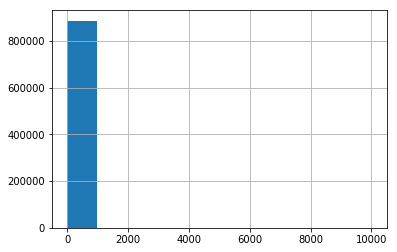

In [48]:
#dti
df["dti"].hist()

dti_counts = df.dti.value_counts()
print(dti_counts)

#check the frequency with which this field is null

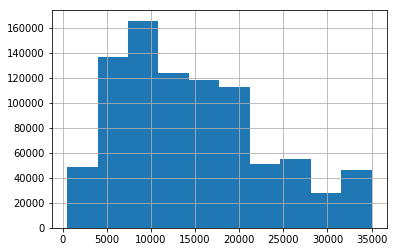

In [49]:
df['funded_amnt'].hist()

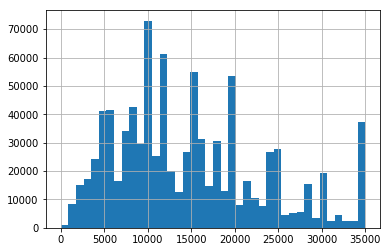

In [56]:
df['funded_amnt_inv'].hist(bins = 40)

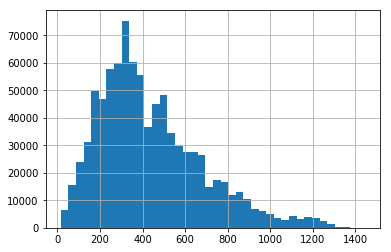

In [55]:
df['installment'].hist(bins = 40)

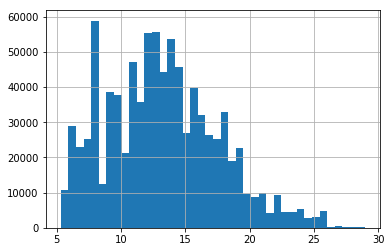

In [54]:
df['int_rate'].hist(bins = 40)

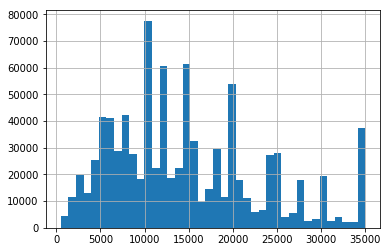

In [58]:
df['loan_amnt'].hist(bins = 40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a91029320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a90d2f1d0>]], dtype=object)

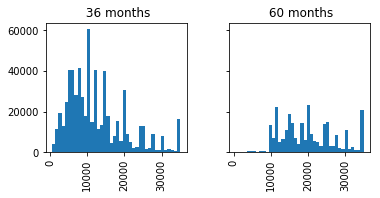

In [68]:
df['loan_amnt'].hist(by = df["term"],
                    bins = 40, layout = (2,4),
                   figsize=(12,6),
                   sharex=True,sharey=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a90aa8c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a9041d240>]], dtype=object)

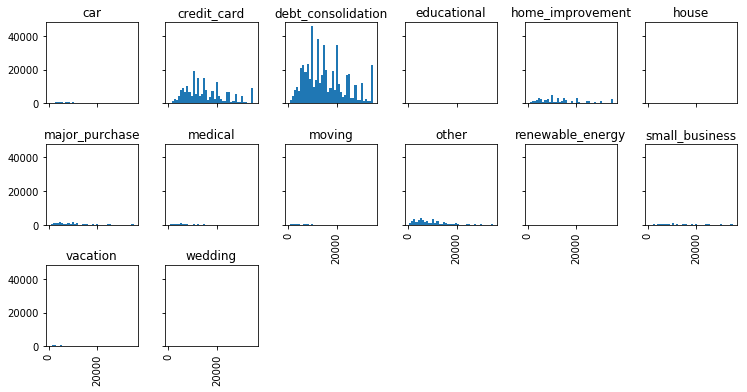

In [70]:
df['loan_amnt'].hist(by = df["purpose"],
                    bins = 40, layout = (3,6),
                   figsize=(12,6),
                   sharex=True,sharey=True)

AttributeError: module 'seaborn' has no attribute 'plt'

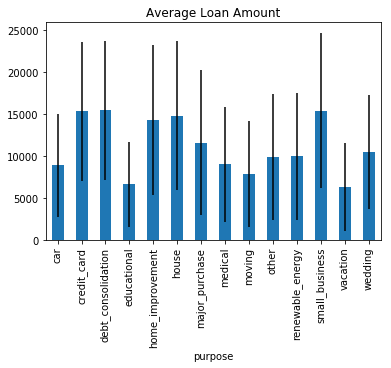

In [74]:
##loan amount by purpose
errs = df.groupby("purpose")["loan_amnt"].agg(np.std)
df.groupby("purpose")["loan_amnt"].agg(np.mean).plot(yerr = errs, kind = 'bar', title = "Average Loan Amount")
sns.plt.ylabel("Average Loan Amount per loan purpose")

AttributeError: module 'seaborn' has no attribute 'plt'

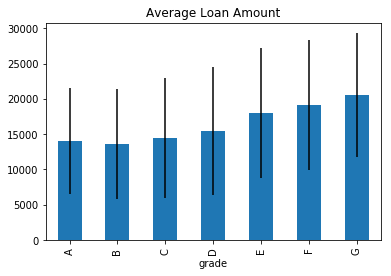

In [75]:
##loan amount by grade
errs = df.groupby("grade")["loan_amnt"].agg(np.std)
df.groupby("grade")["loan_amnt"].agg(np.mean).plot(yerr = errs, kind = 'bar', title = "Average Loan Amount")
sns.plt.ylabel("Average Loan Amount per Loan Grade")

AttributeError: module 'seaborn' has no attribute 'plt'

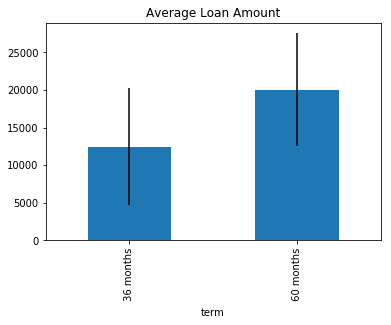

In [76]:
## loan amount by term
errs = df.groupby("term")["loan_amnt"].agg(np.std)
df.groupby("term")["loan_amnt"].agg(np.mean).plot(yerr = errs, kind = 'bar', title = "Average Loan Amount")
sns.plt.ylabel("Average Loan Amount per Term")

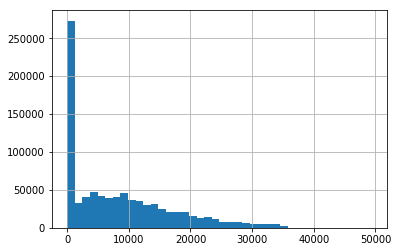

In [59]:
df['out_prncp'].hist(bins=40)

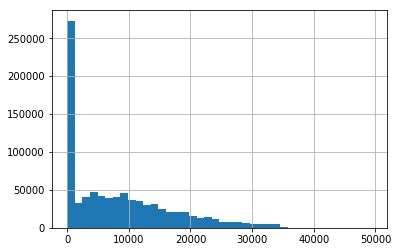

In [60]:
df['out_prncp_inv'].hist(bins=40)

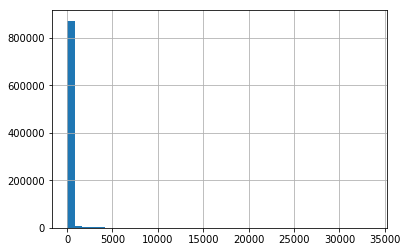

In [61]:
df['recoveries'].hist(bins=40)

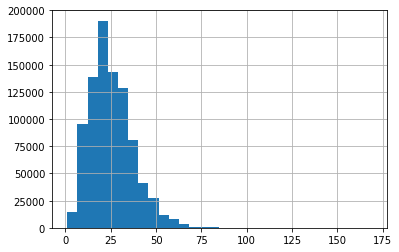

In [66]:
df['total_acc'].hist(bins = 30)

# Make a pairwise plot

In [77]:
# identify all the numeric fields

# df_numeric = 

# sns.pairplot(df_numeric)

# Business Analysis

We are interested in whether the 36 month term loans would make for a good investment.  Using matured 36 month term loans please investigate the following:

     1) What rate of return have these loans generated on average?
     2) When bucketed by year of origination and grade, which cohort had the highest rate of return?
     
Please lay out any simplifying assumptions made.

In [ ]:
#term == "36 months"
#'issue_d' more than 36 months from max date